In [1]:
import tensorflow as tf
import numpy as np

print(tf.__version__)

2.3.1


In [3]:
import numpy as np

X = np.array([1, 2, 3])
Y = np.array([1, 2, 3])

def cost_func(W, X, Y):
    c = 0
    for i in range(len(X)):
        c += (W * X[i] - Y[i]) ** 2
    return c / len(X)

for feed_W in np.linspace(-3, 5, num=15):
    curr_cost = cost_func(feed_W, X, Y)
    print("{:6.3f} | {:10.5f}".format(feed_W, curr_cost))

-3.000 |   74.66667
-2.429 |   54.85714
-1.857 |   38.09524
-1.286 |   24.38095
-0.714 |   13.71429
-0.143 |    6.09524
 0.429 |    1.52381
 1.000 |    0.00000
 1.571 |    1.52381
 2.143 |    6.09524
 2.714 |   13.71429
 3.286 |   24.38095
 3.857 |   38.09524
 4.429 |   54.85714
 5.000 |   74.66667


In [4]:
X = np.array([1, 2, 3])
Y = np.array([1, 2, 3])

def cost_func(W, X, Y):
    hypothesis = X * W
    return tf.reduce_mean(tf.square(hypothesis - Y))

W_values = np.linspace(-3, 5, num=15)
cost_values = []

for feed_W in W_values:
    curr_cost = cost_func(feed_W, X, Y)
    cost_values.append(curr_cost)
    print("{:6.3f} | {:10.5f}".format(feed_W, curr_cost))

-3.000 |   74.66667
-2.429 |   54.85714
-1.857 |   38.09524
-1.286 |   24.38095
-0.714 |   13.71429
-0.143 |    6.09524
 0.429 |    1.52381
 1.000 |    0.00000
 1.571 |    1.52381
 2.143 |    6.09524
 2.714 |   13.71429
 3.286 |   24.38095
 3.857 |   38.09524
 4.429 |   54.85714
 5.000 |   74.66667


In [5]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (8, 6)

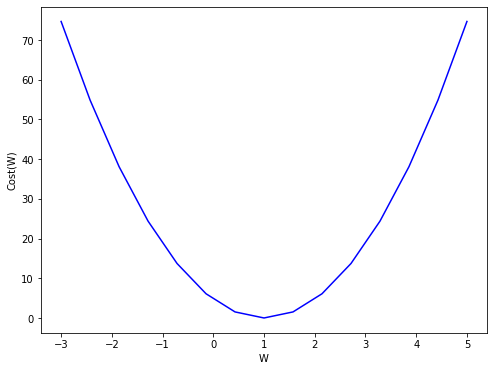

In [7]:
import matplotlib.pyplot as plt

plt.plot(W_values, cost_values, 'b')
plt.xlabel("W")
plt.ylabel("Cost(W)")
plt.show()

In [11]:
tf.random.set_seed(0) # for reproducibility

In [12]:
x_data = [1., 2., 3., 4.]
y_data = [1., 3., 5., 7.]

W = tf.Variable(tf.random.normal((1, ), -100., 100.))

for step in range(300):
    hypothesis = W * x_data
    cost = tf.reduce_mean(tf.square(hypothesis - y_data))
    
    alpha = 0.01
    gradient = tf.reduce_mean(tf.multiply(tf.multiply(W, X) - Y, X))
    descent = W - tf.multiply(alpha, gradient)
    W.assign(descent)
    
    if step % 10 == 0:
        print("{:5} | {:10.4f} | {:10.6f}".format(
            step, cost.numpy(), W.numpy()[0]))

    0 | 18332.2188 |  48.767971
   10 |  6932.8394 |  30.619968
   20 |  2594.6323 |  19.366755
   30 |   954.4020 |  12.388859
   40 |   340.9778 |   8.062004
   50 |   115.8088 |   5.379007
   60 |    35.8616 |   3.715335
   70 |     9.2331 |   2.683725
   80 |     1.5437 |   2.044044
   90 |     0.1678 |   1.647391
  100 |     0.6190 |   1.401434
  110 |     1.4003 |   1.248922
  120 |     2.0775 |   1.154351
  130 |     2.5716 |   1.095710
  140 |     2.9065 |   1.059348
  150 |     3.1252 |   1.036801
  160 |     3.2649 |   1.022819
  170 |     3.3532 |   1.014150
  180 |     3.4086 |   1.008774
  190 |     3.4432 |   1.005441
  200 |     3.4647 |   1.003374
  210 |     3.4781 |   1.002092
  220 |     3.4864 |   1.001297
  230 |     3.4916 |   1.000804
  240 |     3.4948 |   1.000499
  250 |     3.4968 |   1.000309
  260 |     3.4980 |   1.000192
  270 |     3.4988 |   1.000119
  280 |     3.4992 |   1.000074
  290 |     3.4995 |   1.000046


In [13]:
print(5.0 * W)
print(2.5 * W)

tf.Tensor([5.0001483], shape=(1,), dtype=float32)
tf.Tensor([2.5000741], shape=(1,), dtype=float32)


In [14]:
x_data = [1., 2., 3., 4.]
y_data = [1., 3., 5., 7.]

W = tf.Variable([5.0])

for step in range(300):
    hypothesis = W * x_data
    cost = tf.reduce_mean(tf.square(hypothesis - y_data))

    alpha = 0.01
    gradient = tf.reduce_mean(tf.multiply(tf.multiply(W, x_data) - y_data, x_data))
    descent = W - tf.multiply(alpha, gradient)
    W.assign(descent)
    
    if step % 10 == 0:
        print("{:5} | {:10.4f} | {:10.6f}".format(
            step, cost.numpy(), W.numpy()[0]))

    0 |    83.5000 |   4.750000
   10 |    17.6915 |   3.080629
   20 |     3.8521 |   2.315085
   30 |     0.9417 |   1.964020
   40 |     0.3297 |   1.803027
   50 |     0.2009 |   1.729199
   60 |     0.1739 |   1.695343
   70 |     0.1682 |   1.679817
   80 |     0.1670 |   1.672697
   90 |     0.1667 |   1.669432
  100 |     0.1667 |   1.667935
  110 |     0.1667 |   1.667248
  120 |     0.1667 |   1.666933
  130 |     0.1667 |   1.666789
  140 |     0.1667 |   1.666723
  150 |     0.1667 |   1.666692
  160 |     0.1667 |   1.666678
  170 |     0.1667 |   1.666672
  180 |     0.1667 |   1.666669
  190 |     0.1667 |   1.666668
  200 |     0.1667 |   1.666667
  210 |     0.1667 |   1.666667
  220 |     0.1667 |   1.666667
  230 |     0.1667 |   1.666667
  240 |     0.1667 |   1.666667
  250 |     0.1667 |   1.666667
  260 |     0.1667 |   1.666667
  270 |     0.1667 |   1.666667
  280 |     0.1667 |   1.666667
  290 |     0.1667 |   1.666667
